 # Práctica Guiada.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión Lineal \\
  

 ----



## NOTA: Saque una copia de este colab para poder trabajar en su ordenador.

1.  En esta práctica se pide realizar pruebas utilizando   diferentes funciones de pérdida.

2.  Su equipo debe implementar el algoritmo de *machine learning* para  regresión lineal y realizar las correspondientes pruebas el siguiente  [Dataset](https://drive.google.com/file/d/1W60C0Vkqx6qWhIZLADezokQugMwmfb22/view?usp=sharing).  

3.  Deberá seleccionar del Dataset un 70% para entrenamiento y un 30% para realizar *testing*. Recuerde que los datos tanto para entrenamieto como para *testing* deben ser tomados aleatoriamente \\

4. Utilizar las siguientes funciones de pérdida para realizar las comparaciones. Además, recuerde que las derivadas van a cambiar cada vez que cambie le función de pérdida.

  *   MSE Loss Function \\

    $MSE = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i)) ²$ \\

  *   MAE Loss Function \\
$MAE = \frac{1}{m}\sum_{i=0}^m |y_i - h(x_i)|$ \\

Existen otras funciones de pérdida en regresión. A continuación mostramos dos de ellas.

  *   Hubber Loss Function \\
\begin{align}
L(y,h(x)) = \left\{ \begin{array}{cl}
\frac{1}{2} \left[y-h(x)\right]^2 & \text{for }|y-h(x)| \le \delta, \\
\delta \left(|y-h(x))|-\delta/2\right) & \text{otherwise.}
\end{array}\right.
\end{align} \\

  *   Log cosh Loss \\
  $LCE = \sum_{i=0}^m \log(cosh(y_i - h(x_i)))$  \\


# Gráfica comparativa entre funciones de pérdida.
Fuente: https://programmerclick.com/article/23511327338/

 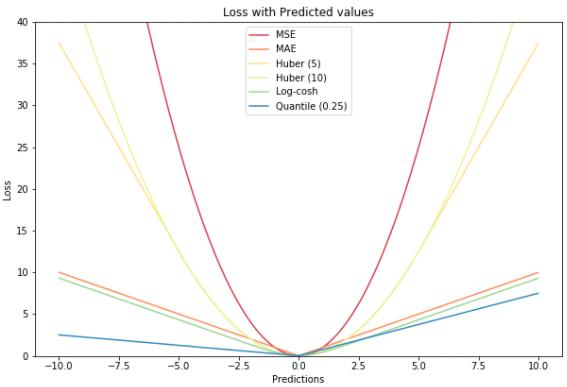

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

Crear el DataSet







Text(0.5, 1.0, 'Gráfico de ingreso vs felicidad')

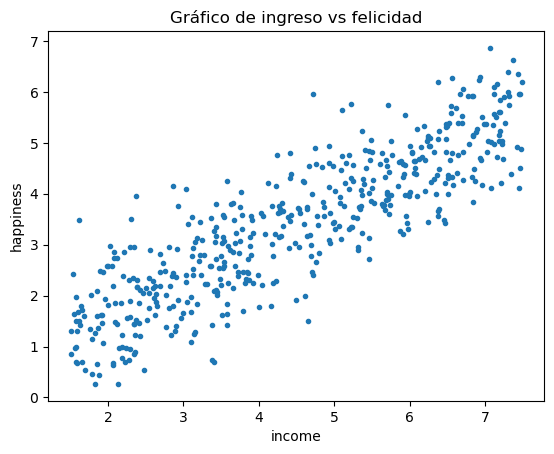

In [4]:
dataset = pd.read_csv('db.csv')

x = (dataset[['income']]).to_numpy()
y = (dataset[['happiness']]).to_numpy()

plt.plot(x,y,'.')
plt.xlabel('income')
plt.ylabel('happiness')
plt.title('Gráfico de ingreso vs felicidad')

# Modelo
$h(x_i) = x_i*w + b$

In [5]:
def h(x, w, b):
  
  x = np.array(x)
  
  return (x*w+b)


# Loss function
$\mathcal{L} = \frac{1}{2n}\sum_{i=0}^n (y_i - h(x_i))^2$

In [6]:
def Error(x, y, w, b):

    y = np.array(y)
    
    return 0.5 * np.mean((y - h(x, w, b)) ** 2)


# Cálculo de derivadas
$db = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))(-1)$

$dw = \frac{1}{n}\sum_{i=0}^n(y_i - h(x_i))(-x_i)$

In [7]:
def derivada(x, y, w, b):

    y = np.array(y)
    db = np.mean((y - h(x, w, b)) * (-1)) 
    dw = np.mean((y - h(x, w, b)) * (-x))
    
    return db, dw


# Actualiación de parámetros

$h(x_i) = b + x_i*w $

$w  = w - \alpha*\frac{\partial L}{\partial w} $

$b  = b - \alpha*\frac{\partial L}{\partial b} $


In [8]:
def update(w, b, alfa, db, dw):

    new_b = b - alfa * db
    new_w = w - alfa * dw
    
    return new_b, new_w

# Training

In [18]:
def train(x, y, alfa, epochs):
    np.random.seed(2001)
    w = np.random.rand()
    b = np.random.rand()
    L = Error(x, y, w, b)
    loss = []
    for i in range(epochs):
        db, dw = derivada(x, y, w, b)
        b, w = update(w, b, alfa, db, dw)
        L = Error(x, y, w, b)
        # print(L)
        loss.append(L)
    return b, w,loss


def Plot_Loss(epochs,loss):
   plt.plot(epochs, loss)
   plt.xlabel('Epochs')
   plt.ylabel('Loss')
   plt.title('Loss Function')


# Testing

In [13]:
def test(x,y,w,b):
  x = np.array(x)
  y = np.array(y)
  return np.mean((y - h(x, w, b)))


In [65]:
train_size = int(len(x) * 0.7)
trainx = x[:train_size]
trainy = y[:train_size]
testx = x[train_size:]
testy = y[train_size:]


b, w, loss = train(trainx, trainy,  0.0001,1000)
# 0.5, 0.1, 0.01, 0.001, 0.00001
print("error:",test(testx, testy, w, b))


error: 0.23825015430217397


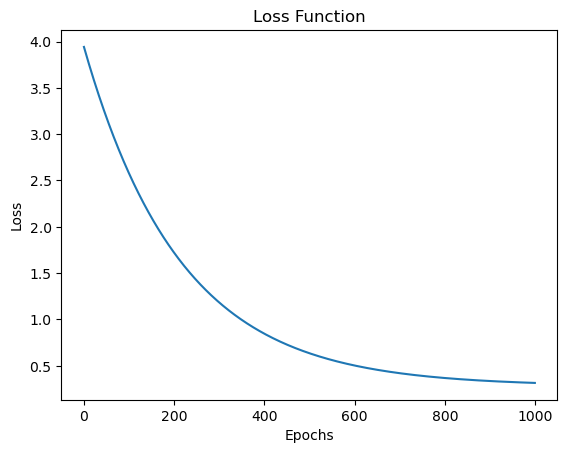

In [66]:
Plot_Loss(range(len(loss)),loss)
# print(len(loss))


Text(0.5, 1.0, 'Gráfico de ingreso vs felicidad')

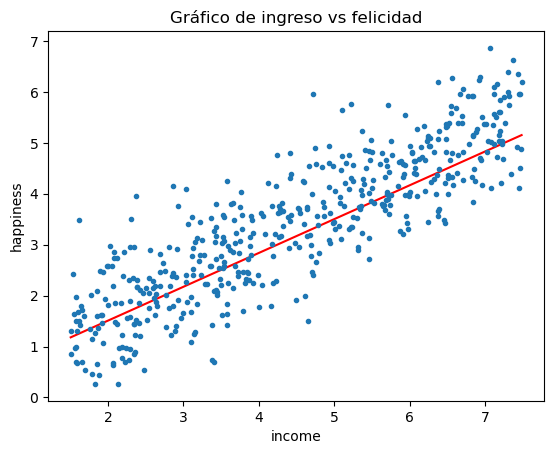

In [75]:
x_ = np.linspace(min(x), max(x), len(x))
y_ = w*x_ + b
# print(x_)
plt.plot(x_, y_, '-r')
plt.plot(x,y,'.')
plt.xlabel('income')
plt.ylabel('happiness')
plt.title('Gráfico de ingreso vs felicidad')


# Luego de ejecutar la práctica
1. Si su modelo converge, ¿puede notar que el valor del error está subiendo y bajando? En caso afirmativo, ¿cuál cree que es la causa?
2. Ahora, transforme los valores de X y Y a un rango entre [0,1], es decir, normalice los datos utilizando la siguiente ecuación: `v = (v - min) / (max - min)`, donde v puede ser x o y, dependiendo de qué variable esté normalizando. Luego, ejecute nuevamente su código.
3. Si su código es correcto, debería notar que la función de error disminuye sin problemas. ¿Por qué cree que ocurre esto?
4. ¿Cuál es el valor promedio del error de entrenamiento de su modelo?
5. ¿Cuál es el valor promedio del error de prueba de su modelo?
6. Grafique la evolución del error de entrenamiento a lo largo del tiempo.
7. Entrene su modelo con distintos valores de α `{0.5, 0.1, 0.01, 0.001, 0.00001}` y luego de entrenarlo, verifique el error promedio en las pruebas correspondientes.
8. ¿Qué ocurre cuando el valor de α está cerca de 1 y qué sucede si es muy pequeño?

